In [1]:
# read the daily activity data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys



In [2]:
# read the data
df_activity = pd.read_csv('dailyActivity_merged.csv')

df_activity.head()
df_activity.info()
df_activity.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [3]:
df_activity['ActivityDate'] =  pd.to_datetime(df_activity['ActivityDate'])

In [4]:
df_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [5]:
# read the data
df_sleep = pd.read_csv('sleepDay_merged.csv')

df_sleep.head()
df_sleep.info()
df_sleep.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [6]:
df_sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [7]:
df_sleep['SleepDay'] = df_sleep['SleepDay'].str[0:-12]
df_sleep['ActivityDate'] =  pd.to_datetime(df_sleep['SleepDay'])
df_sleep.drop('SleepDay', axis=1, inplace=True)

In [8]:
df_sleep

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,1,327,346,2016-04-12
1,1503960366,2,384,407,2016-04-13
2,1503960366,1,412,442,2016-04-15
3,1503960366,2,340,367,2016-04-16
4,1503960366,1,700,712,2016-04-17
...,...,...,...,...,...
408,8792009665,1,343,360,2016-04-30
409,8792009665,1,503,527,2016-05-01
410,8792009665,1,415,423,2016-05-02
411,8792009665,1,516,545,2016-05-03


In [9]:
# combine the data

df = pd.merge(df_activity, df_sleep, on=['Id', 'ActivityDate'], how = 'right')

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,6.038620,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,1.118644,419.467312,458.639225
std,2.060360e+09,4156.926990,3.051998,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,0.345521,118.344679,127.101607
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5206.000000,3.600000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,1.000000,361.000000,403.000000
50%,4.702922e+09,8925.000000,6.290000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,11393.000000,8.030000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


In [10]:
# check the missing values

df.isnull().sum()



Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

In [11]:
# check the correlation

df.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,1.000000,0.011345,0.078405,0.076961,0.329722,0.207116,-0.051491,-0.075502,0.033373,0.270355,-0.021372,-0.180689,-0.007420,0.402974,-0.012552,0.080117,0.002112
TotalSteps,0.011345,1.000000,0.981533,0.981652,0.119811,0.677084,0.581008,0.586532,0.046653,0.540876,0.569649,0.418884,-0.131632,0.411996,-0.162490,-0.186866,-0.164060
TotalDistance,0.078405,0.981533,1.000000,0.999561,0.174100,0.702748,0.561138,0.597666,0.059005,0.573987,0.550300,0.387456,-0.128397,0.527728,-0.144390,-0.172143,-0.158095
TrackerDistance,0.076961,0.981652,0.999561,1.000000,0.162110,0.701789,0.559860,0.598759,0.038991,0.573678,0.550452,0.387968,-0.128465,0.528991,-0.144043,-0.172783,-0.158271
LoggedActivitiesDistance,0.329722,0.119811,0.174100,0.162110,1.000000,0.201486,0.026928,0.061041,0.374190,0.350609,-0.023819,-0.091193,0.023434,0.323124,-0.047257,-0.041253,-0.061749
VeryActiveDistance,0.207116,0.677084,0.702748,0.701789,0.201486,1.000000,0.225194,-0.038710,0.052483,0.850184,0.285730,-0.169330,0.006554,0.439557,-0.094848,-0.104905,-0.112891
ModeratelyActiveDistance,-0.051491,0.581008,0.561138,0.559860,0.026928,0.225194,1.000000,0.156589,0.064924,0.183424,0.945402,0.034274,-0.042159,0.079078,-0.064137,-0.239093,-0.094983
LightActiveDistance,-0.075502,0.586532,0.597666,0.598759,0.061041,-0.038710,0.156589,1.000000,0.001859,-0.067224,0.094685,0.853070,-0.210728,0.342301,-0.102216,-0.042594,-0.091497
SedentaryActiveDistance,0.033373,0.046653,0.059005,0.038991,0.374190,0.052483,0.064924,0.001859,1.000000,0.018641,0.026984,0.005680,0.037328,0.027032,-0.036600,-0.038722,-0.054537
VeryActiveMinutes,0.270355,0.540876,0.573987,0.573678,0.350609,0.850184,0.183424,-0.067224,0.018641,1.000000,0.316221,-0.209933,-0.016930,0.610489,-0.119740,-0.090436,-0.112488


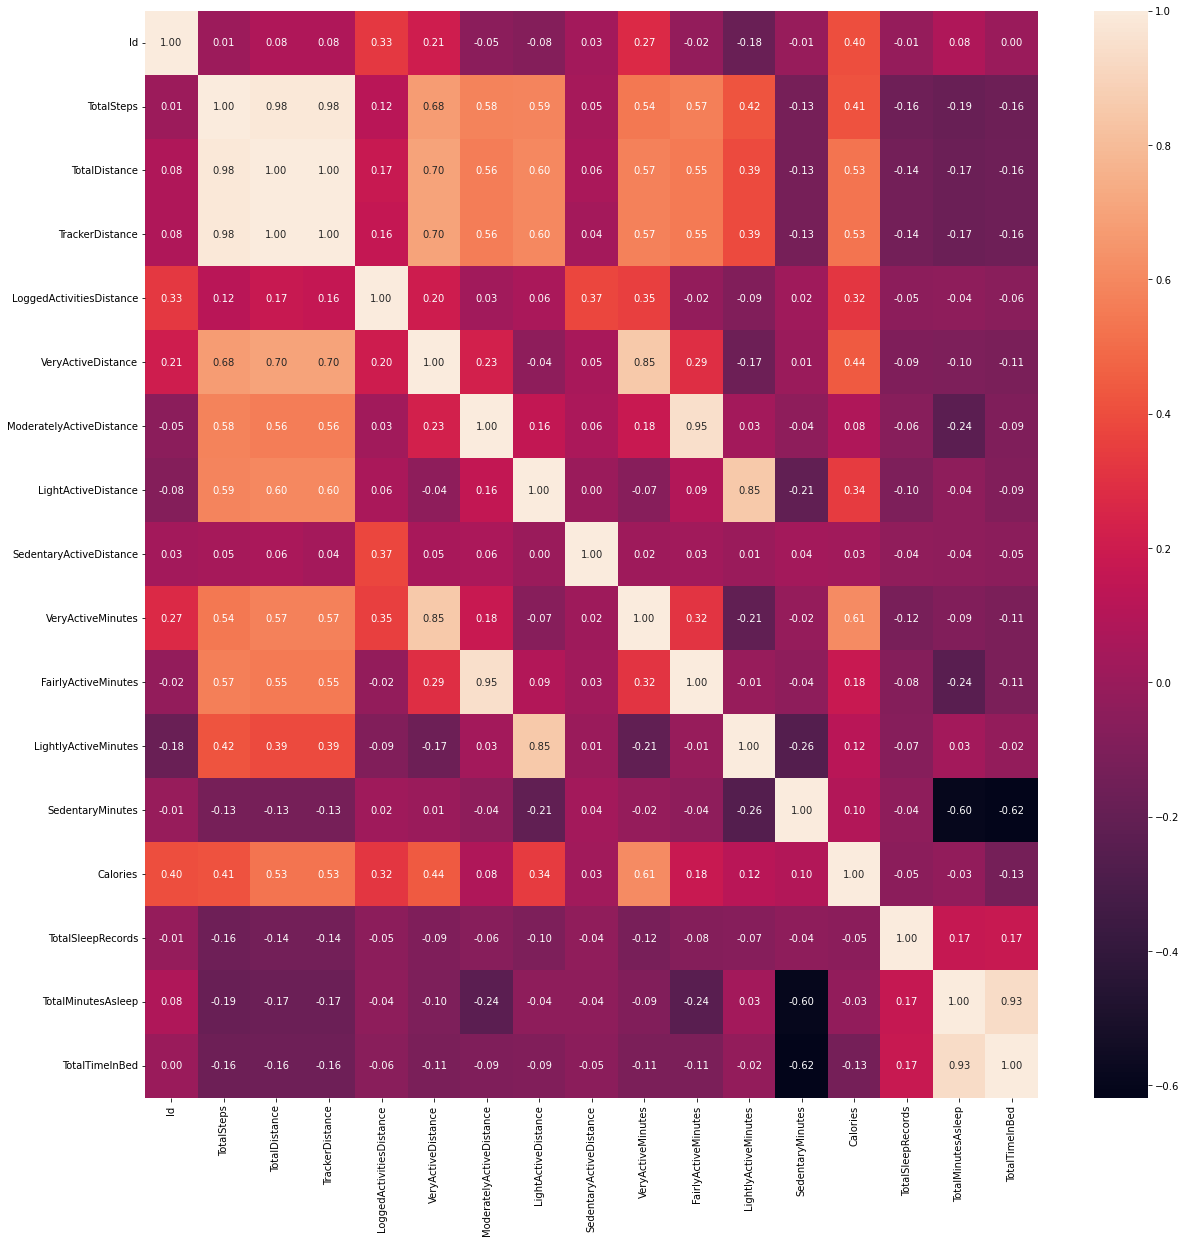

In [12]:
# plot the correlation

plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(), annot=True, fmt='.2f')

plt.show()

In [13]:
df


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545


In [14]:
df.info

<bound method DataFrame.info of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162           8.50             8.50   
1    1503960366   2016-04-13       10735           6.97             6.97   
2    1503960366   2016-04-15        9762           6.28             6.28   
3    1503960366   2016-04-16       12669           8.16             8.16   
4    1503960366   2016-04-17        9705           6.48             6.48   
..          ...          ...         ...            ...              ...   
408  8792009665   2016-04-30        7174           4.59             4.59   
409  8792009665   2016-05-01        1619           1.04             1.04   
410  8792009665   2016-05-02        1831           1.17             1.17   
411  8792009665   2016-05-03        2421           1.55             1.55   
412  8792009665   2016-05-04        2283           1.46             1.46   

     LoggedActivitiesDistance  VeryActiveDistance  Mode

In [15]:
df_final= df


In [16]:
def Sleep_cat(x):
    if x <= 300:
        return 0
    elif x > 300and x<=480:
        return 1
    else:
        return 2


In [17]:
df_final['Sleep Category'] = df_final['TotalMinutesAsleep'].apply(Sleep_cat)

In [18]:
df_final

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Sleep Category
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,1
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,1
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,1
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,1
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,2
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,1
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,2


In [19]:
df_final= df_final.drop('TotalSleepRecords', axis=1)

In [20]:
df_final= df_final.drop('TotalMinutesAsleep', axis=1)

In [21]:
df_final=df_final.drop("Id", axis=1)

In [22]:
df_final=df_final.drop("ActivityDate", axis=1)

In [23]:
df_final.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTimeInBed,Sleep Category
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,346,1
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,407,1
2,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,442,1
3,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,367,1
4,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,712,2


In [24]:
X = df_final.drop('Sleep Category', axis=1)
y = df_final['Sleep Category']


In [25]:
X.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTimeInBed
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8541.140436,6.038620,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,458.639225
std,4156.926990,3.051998,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,127.101607
min,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,61.000000
25%,5206.000000,3.600000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,403.000000
50%,8925.000000,6.290000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,463.000000
75%,11393.000000,8.030000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,526.000000
max,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,961.000000


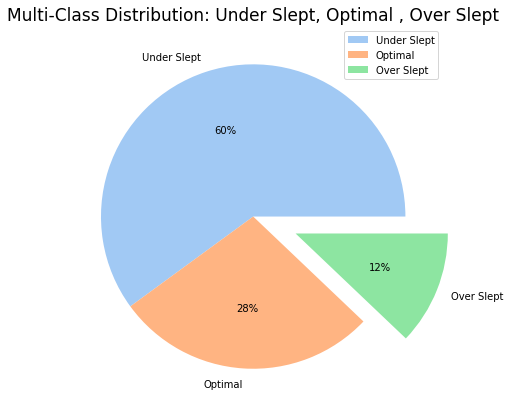

In [26]:
x_class = y.value_counts()
labels = ['Under Slept','Optimal','Over Slept']
plt.get_cmap('hsv')
plt.figure(figsize = (14,7))
colors = sns.color_palette('pastel')[0:5]
plt.title('Multi-Class Distribution: Under Slept, Optimal , Over Slept', fontsize = 17)
plt.pie(x_class, labels = labels, colors = colors, autopct='%.0f%%', explode=[0,0,.3])
plt.legend()
plt.show()

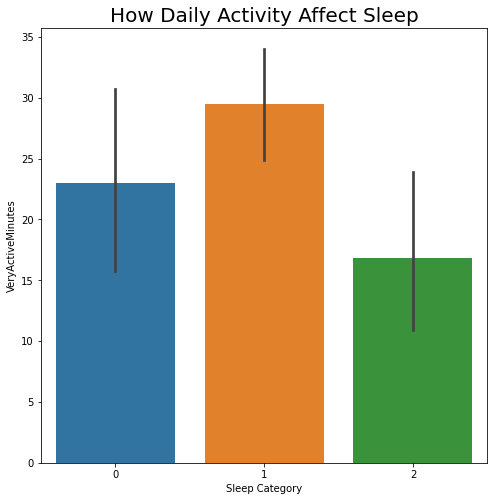

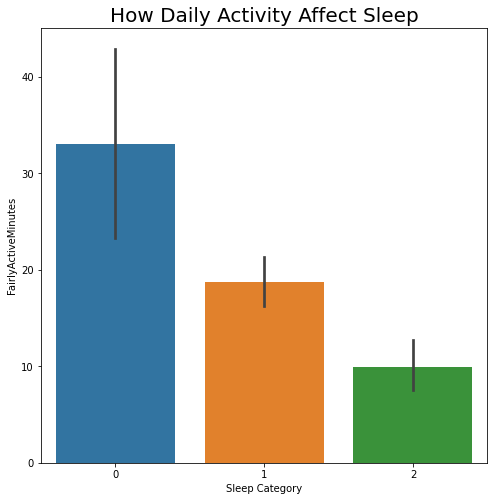

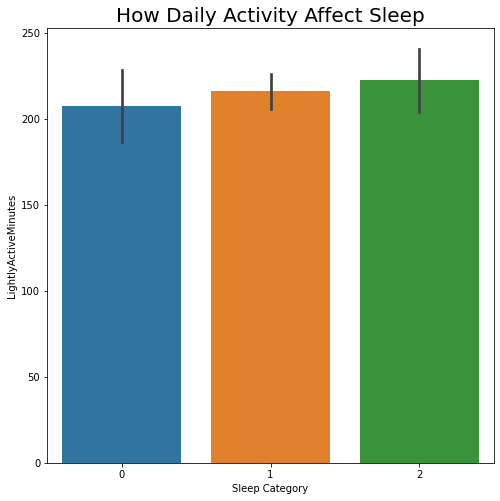

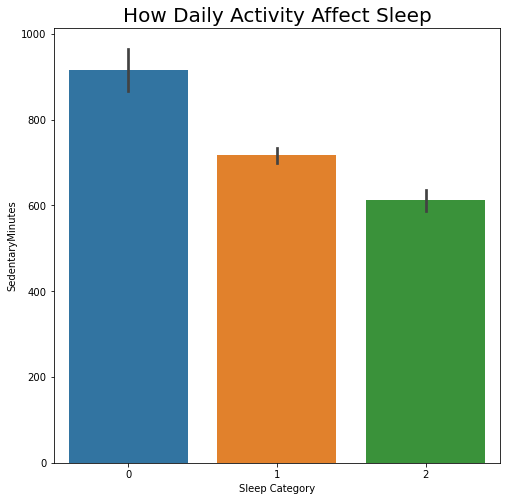

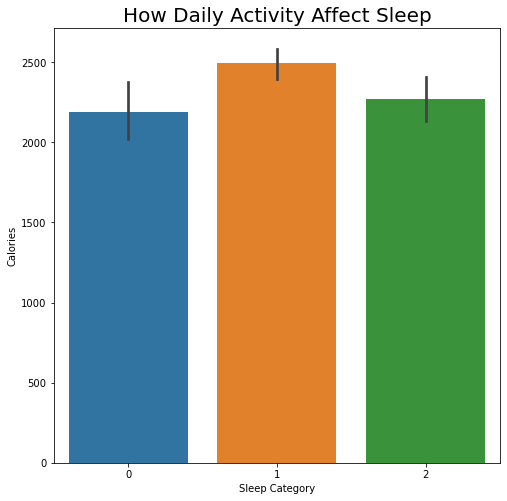

In [27]:
y_labels = [df["VeryActiveMinutes"], df["FairlyActiveMinutes"], df["LightlyActiveMinutes"], df["SedentaryMinutes"], df["Calories"]]
x_labels = df['Sleep Category']
for i in range(5):
    plt.figure(figsize=(8,8))
    plt.title("How Daily Activity Affect Sleep",fontsize=20)
    ax = sns.barplot(y= y_labels[i], x=x_labels)

#**BUILDING MODEL**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [30]:
log_model = LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state= 42)

In [31]:
log_model.fit(X_train,y_train)

/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [32]:
df_final['TotalMinutesAsleep'].dtypes

KeyError: 'TotalMinutesAsleep'

In [33]:
predictions = log_model.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.86      0.93      0.90        60
           2       0.93      0.79      0.85        33

    accuracy                           0.88       104
   macro avg       0.87      0.85      0.86       104
weighted avg       0.88      0.88      0.87       104



In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
predictions2 = knn_model.predict(X_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.63      0.88      0.74        60
           2       0.69      0.33      0.45        33

    accuracy                           0.63       104
   macro avg       0.61      0.47      0.48       104
weighted avg       0.64      0.63      0.60       104



In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
forest_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [38]:
predictions3 = forest_model.predict(X_test)
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.88      0.97      0.92        60
           2       0.96      0.82      0.89        33

    accuracy                           0.90       104
   macro avg       0.91      0.87      0.89       104
weighted avg       0.91      0.90      0.90       104



As we Can see the best preformace was for random forest where our accuacey scores where the highest 

-----------------------------------------------------------------

In [39]:
# Perform post model evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 9  2  0]
 [ 2 56  2]
 [ 0  7 26]]
0.875
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.86      0.93      0.90        60
           2       0.93      0.79      0.85        33

    accuracy                           0.88       104
   macro avg       0.87      0.85      0.86       104
weighted avg       0.88      0.88      0.87       104



In [41]:
print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[ 2  9  0]
 [ 2 53  5]
 [ 0 22 11]]
0.6346153846153846
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.63      0.88      0.74        60
           2       0.69      0.33      0.45        33

    accuracy                           0.63       104
   macro avg       0.61      0.47      0.48       104
weighted avg       0.64      0.63      0.60       104



In [42]:

print(confusion_matrix(y_test,predictions3))
print(accuracy_score(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[ 9  2  0]
 [ 1 58  1]
 [ 0  6 27]]
0.9038461538461539
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.88      0.97      0.92        60
           2       0.96      0.82      0.89        33

    accuracy                           0.90       104
   macro avg       0.91      0.87      0.89       104
weighted avg       0.91      0.90      0.90       104



In [43]:
# Perform some hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [44]:
grid.best_params_

grid.best_estimator_

grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 0 11  0]
 [ 0 60  0]
 [ 0 32  1]]
0.5865384615384616
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.58      1.00      0.74        60
           2       1.00      0.03      0.06        33

    accuracy                           0.59       104
   macro avg       0.53      0.34      0.27       104
weighted avg       0.65      0.59      0.44       104



/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


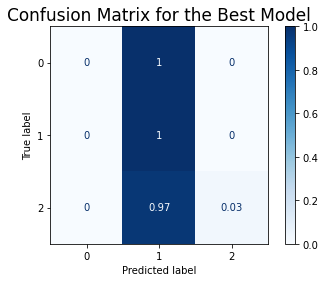

/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


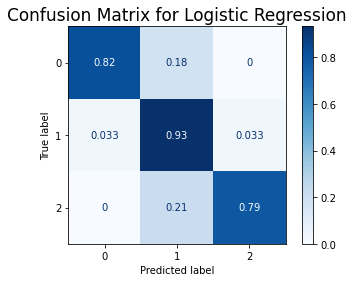

/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


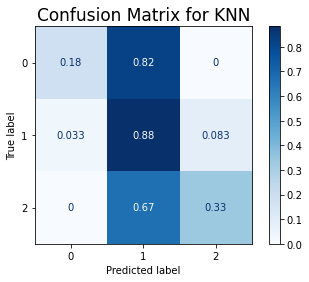

/Users/reem/opt/anaconda3/envs/imageproc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


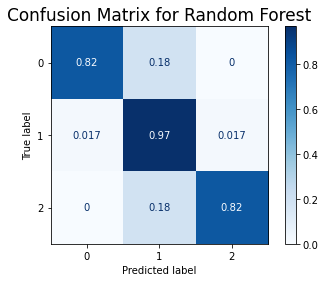

In [45]:
# Plot the confusion matrix for the best model

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for the Best Model', fontsize = 17)
plt.show()

# Plot the confusion matrix for Logistic Regression

plot_confusion_matrix(log_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 17)
plt.show()

# Plot the confusion matrix for KNN

plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for KNN', fontsize = 17)
plt.show()

# Plot the confusion matrix for Random Forest

plot_confusion_matrix(forest_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for Random Forest', fontsize = 17)
plt.show()